# Gradient Boosting: XGBoost

This is a sample tutorial on how to use the XGBoost library.

XGBoost can be installed as:

```bash
sudo pip install xgboost
```
XGBoost can be upgraded as:
```bash
sudo pip install --upgrade xgboost
```

The code in this notebook is based on the following book:

### XGBoost With Python by Jason Brownlee

https://machinelearningmastery.com/xgboost-with-python/

In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

We are going to user the Pima Indians dataset (from Lecture 6):

https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

This dataset is comprised of 8 input variables that describe medical details of patients and one output variable to indicate whether the patient will have an onset of diabetes within 5 years.

In [2]:
filename = '../datasets/pima_indians_diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# df stands for "Data Frame"
df = pd.read_csv(filename, names=names)

# Split the data into X and Y
array = df.values
X = array[:,0:8]
Y = array[:,8]

Split the data into a training and test set:

In [3]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

Train the XGBoost Model:

In [4]:
# fit model to training data
model = XGBClassifier(use_label_encoder=False, eval_metric='error')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

We can see the parameters used in a trained model by printing the model, for example:

We can make predictions with the model:

In [5]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [6]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.02%


## Data Preparation for Gradient Boosting

Internally, XGBoost models represent all problems as a regression predictive modeling problem
that only takes numerical values as input. If your data is in a different form, it must be prepared
into the expected format.

We are going to use the IRIS dataset: http://archive.ics.uci.edu/ml/datasets/Iris
This dataset has the class as a categorical feature. Since XGBoost expects numeric features, the dataset cannot be used as-is, its class must be converted into numbers.

In [7]:
filename = "../datasets/iris.data"
names = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']
# df stands for "Data Frame"
df = pd.read_csv(filename, header=None, names=names)

# Split the data into X and Y
array = df.values
X = array[:,0:4]
Y = array[:,4]

In [8]:
print(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

Load the encoder:

In [9]:
from sklearn.preprocessing import LabelEncoder
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

In [10]:
print(label_encoded_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Train the XGBoost Model:

In [11]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y,
test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier(use_label_encoder=False, eval_metric='error')
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


Make predictions and print the accuracy:

In [12]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.00%


### Notice
Notice how the XGBoost model is configured to automatically model the multiclass classification problem using the multi:softprob objective, a variation on the softmax loss function
to model class probabilities. This suggests that internally, that the output class is converted
into a one hot type encoding automatically.

## Plot a Single XGBoost Decision Tree

In [13]:
from xgboost import XGBClassifier
from xgboost import plot_tree
from matplotlib import pyplot as plt
%matplotlib notebook

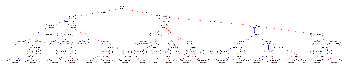

In [15]:
filename = '../datasets/pima_indians_diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# df stands for "Data Frame"
df = pd.read_csv(filename, names=names)

# Split the data into X and Y
array = df.values
X = array[:,0:8]
Y = array[:,8]
# fit model no training data
model = XGBClassifier(use_label_encoder=False, eval_metric='error')
model.fit(X, Y)
# plot single tree
plot_tree(model)
plt.show()

Plot the $4^{th}$ tree:

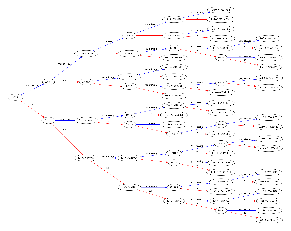

In [17]:
plot_tree(model, num_trees=3, rankdir='LR')
plt.show()

### Feature importance

In [18]:
print(model.feature_importances_)

[0.10621197 0.2424023  0.08803366 0.07818192 0.10381887 0.1486732
 0.10059207 0.13208601]


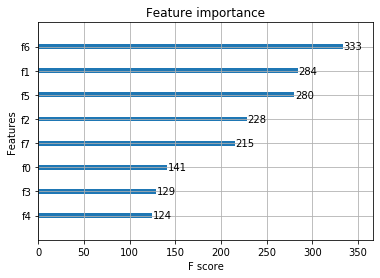

In [19]:
# plot
from xgboost import plot_importance
plot_importance(model)
plt.show()

### Notice

It is interesting to check the skit-learn class `SelectFromModel`.

In [20]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model on all training data
model = XGBClassifier(use_label_encoder=False,eval_metric='error')
model.fit(X_train, y_train)
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
  # select features using threshold
  selection = SelectFromModel(model, threshold=thresh, prefit=True)
  select_X_train = selection.transform(X_train)
  # train model
  selection_model = XGBClassifier(use_label_encoder=False,eval_metric='error')
  selection_model.fit(select_X_train, y_train)
  # eval model
  select_X_test = selection.transform(X_test)
  y_pred = selection_model.predict(select_X_test)
  predictions = [round(value) for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)
  print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1],accuracy*100.0))

Thresh=0.088, n=8, Accuracy: 74.02%
Thresh=0.089, n=7, Accuracy: 71.65%
Thresh=0.098, n=6, Accuracy: 71.26%
Thresh=0.098, n=5, Accuracy: 74.41%
Thresh=0.100, n=4, Accuracy: 74.80%
Thresh=0.136, n=3, Accuracy: 71.26%
Thresh=0.152, n=2, Accuracy: 71.26%
Thresh=0.240, n=1, Accuracy: 67.32%


## Monitoring Training Performance

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.28347
[1]	validation_0-error:0.25984
[2]	validation_0-error:0.25591
[3]	validation_0-error:0.24803
[4]	validation_0-error:0.24409
[5]	validation_0-error:0.24803
[6]	validation_0-error:0.25591
[7]	validation_0-error:0.24803
[8]	validation_0-error:0.25591
[9]	validation_0-error:0.24409
[10]	validation_0-error:0.24803
[11]	validation_0-error:0.24409
[12]	validation_0-error:0.23228
[13]	validation_0-error:0.24016
[14]	validation_0-error:0.23622
[15]	validation_0-error:0.24409
[16]	validation_0-error:0.25591
[17]	validation_0-error:0.23622
[18]	validation_0-error:0.24016
[19]	validation_0-error:0.23622
[20]	validation_0-error:0.23622
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23622
[23]	validation_0-error:0.24409
[24]	validation_0-error:0.24409
[25]	validation_0-error:0.24016
[26]	validation_0-error:0.24409
[27]	validation_0-error:0.24409
[28]	validation_0-error:0.25591
[29]	validation_0-error:0.25197
[30]	validation_0-error:0.24803
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

XGBoost supports a suite of evaluation metrics not limited to:
 * rmse for root mean squared error.
 * mae for mean absolute error.
 * logloss for binary logarithmic loss and mlogloss for multiclass log loss (cross entropy).
 * error for classification error.
 * auc for area under ROC curve.

### Learning curves

In [21]:
results = model.evals_result()
print(results)

AttributeError: 'XGBClassifier' object has no attribute 'evals_result_'

Accuracy: 74.02%


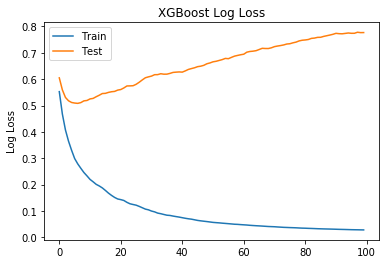

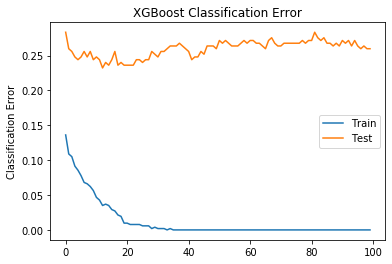

In [22]:
model = XGBClassifier(use_label_encoder=False)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

### Early stopping

[0]	validation_0-logloss:0.55257	validation_1-logloss:0.60491
[1]	validation_0-logloss:0.46754	validation_1-logloss:0.55934
[2]	validation_0-logloss:0.40734	validation_1-logloss:0.53068
[3]	validation_0-logloss:0.36480	validation_1-logloss:0.51795
[4]	validation_0-logloss:0.33012	validation_1-logloss:0.51153
[5]	validation_0-logloss:0.29868	validation_1-logloss:0.50935
[6]	validation_0-logloss:0.27852	validation_1-logloss:0.50818
[7]	validation_0-logloss:0.26182	validation_1-logloss:0.51097
[8]	validation_0-logloss:0.24578	validation_1-logloss:0.51760
[9]	validation_0-logloss:0.23298	validation_1-logloss:0.51912
[10]	validation_0-logloss:0.21955	validation_1-logloss:0.52503
[11]	validation_0-logloss:0.21051	validation_1-logloss:0.52697
[12]	validation_0-logloss:0.20083	validation_1-logloss:0.53335
[13]	validation_0-logloss:0.19466	validation_1-logloss:0.53905
[14]	validation_0-logloss:0.18725	validation_1-logloss:0.54546
[15]	validation_0-logloss:0.17765	validation_1-logloss:0.54613
Ac

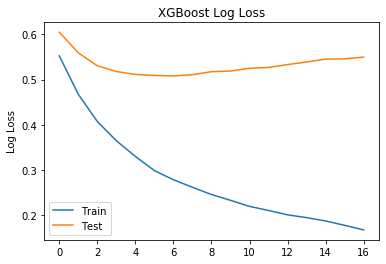

In [23]:
model = XGBClassifier(use_label_encoder=False)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["logloss"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()